In [10]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")


In [11]:
# Load the dataset (adjust path if needed)
# Skip metadata rows at the top of the CSV
df = pd.read_csv("SeriesReport-Seasonally Adjusted Sales - Monthly (Millions of Dollars).csv", skiprows=10)

# Display the first few rows
df.head()


,01-10-1992,170625
0,01-11-1992,171003.0
1,01-12-1992,173105.0
2,01-01-1993,175108.0
3,01-02-1993,173744.0
4,01-03-1993,172306.0


In [12]:
# Rename columns for easier access and check for missing values
df.columns = ['Date', 'Sales']
print(df.isnull().sum())
df.head()


Date     0
Sales    7
dtype: int64


,Date,Sales
0,01-11-1992,171003.0
1,01-12-1992,173105.0
2,01-01-1993,175108.0
3,01-02-1993,173744.0
4,01-03-1993,172306.0


In [13]:
# Convert the 'Date' column to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Convert sales to float (if not already)
df['Sales'] = df['Sales'].astype(float)

# Display info
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 338 entries, 1992-01-11 to 2020-01-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   331 non-null    float64
dtypes: float64(1)
memory usage: 5.3 KB


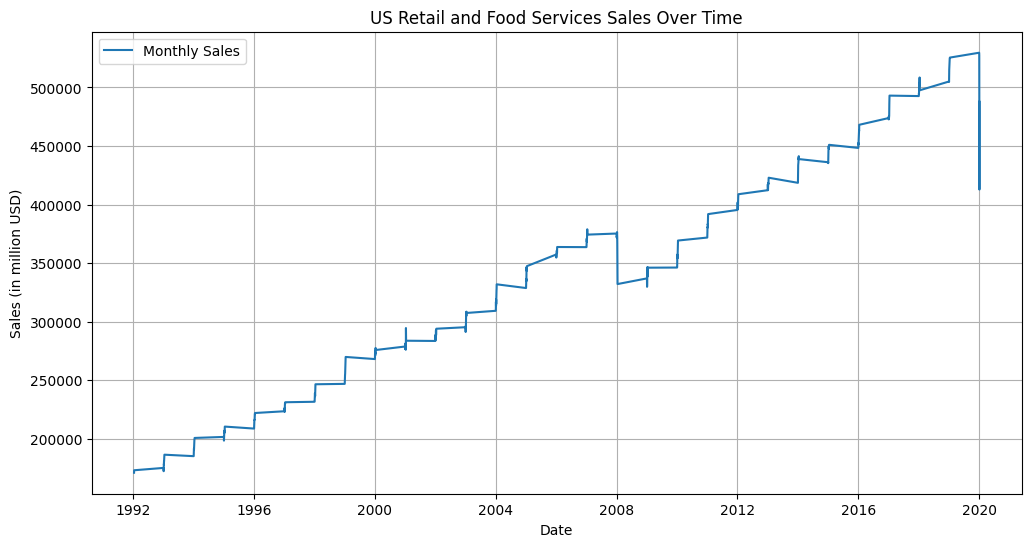

In [14]:
# Visualize the sales data over time
plt.figure(figsize=(12,6))
plt.plot(df['Sales'], label='Monthly Sales')
plt.title("US Retail and Food Services Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales (in million USD)")
plt.grid(True)
plt.legend()
plt.show()


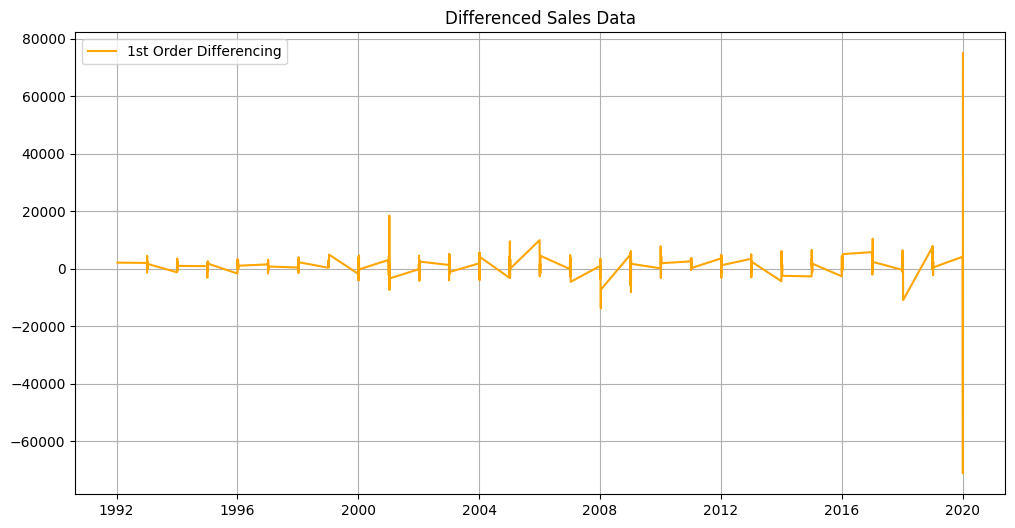

In [15]:
# Check for stationarity (you can use ADF test later for depth)
# For now, just visualize differenced data
df['Sales_diff'] = df['Sales'].diff()
plt.figure(figsize=(12,6))
plt.plot(df['Sales_diff'], color='orange', label='1st Order Differencing')
plt.title("Differenced Sales Data")
plt.grid(True)
plt.legend()
plt.show()


In [16]:
# Fit an ARIMA model
# You can fine-tune the (p,d,q) values using AIC or grid search
model = ARIMA(df['Sales'], order=(1,1,1))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  338
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3387.827
Date:                Tue, 29 Jul 2025   AIC                           6781.653
Time:                        00:47:26   BIC                           6793.113
Sample:                             0   HQIC                          6786.221
                                - 338                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4202      0.452      0.929      0.353      -0.466       1.306
ma.L1         -0.4757      0.444     -1.072      0.284      -1.346       0.394
sigma2      4.816e+07   4.94e-07   9.75e+13      0.0

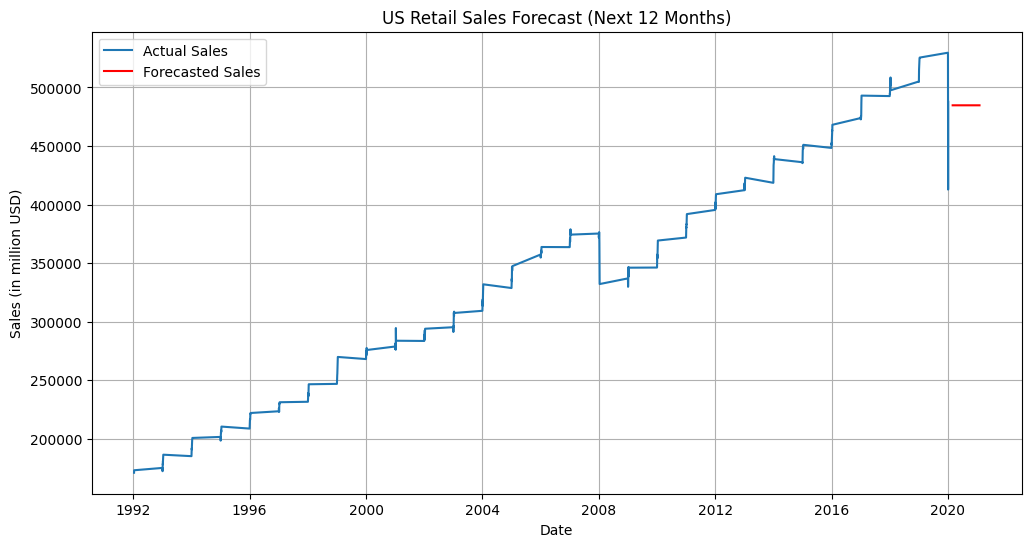

In [17]:
# Forecast the next 12 months
forecast = model_fit.forecast(steps=12)

# Create forecast date range
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')

# Plot actual and forecast
plt.figure(figsize=(12,6))
plt.plot(df['Sales'], label='Actual Sales')
plt.plot(future_dates, forecast, label='Forecasted Sales', color='red')
plt.title("US Retail Sales Forecast (Next 12 Months)")
plt.xlabel("Date")
plt.ylabel("Sales (in million USD)")
plt.grid(True)
plt.legend()
plt.show()
